<img src="figuras/cabecera.png" alt="Drawing" style="width: 1100px;"/>

# EJERCICIO 3
# Aprendizaje no supervisado: Clustering.

## *Clustering de consumidores*


En el aprendizaje no supervisado, la tarea clásica es el **análisis de clusters** (grupos) en el que se encuentran patrones o grupos ocultos en los datos. La mayoría de las veces las tareas de aprendizaje no supervisado tienen una *solución abierta*, por lo que hay que interpretar los resultados y comprobar si tienen sentido.

**Objetivo:** En este ejemplo se utilizan datos que contienen información acerca del consumo eléctrico de un grupo de consumidores eléctricos. El objetivo es encontrar el número óptimo de clusters para agrupar los diferentes patrones de consumo diarios. El resultado se utilizará para fines comerciales y estratégicos.

### Antes de empezar:

* En el archivo **clustering-consumos.xlsx** se encuentra el conjunto de datos de entrada de este ejemplo (atributos). 
* **NO** existen las etiquetas en el Aprendizaje **NO Supervisado**. 


<img src="figuras/no-supervisado.png" alt="Drawing" style="width: 600px;"/>


## **1. Importar librerías y datos**

In [1]:
# Importar librerías
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Librería de visualización de datos
plt.style.use('seaborn')

# Seleccionamos las columnas que necesitamos
df_consumos = pd.read_excel('dataset/clustering-consumos.xlsx')
df_consumos

,CUPs,h-0,h-1,h-2,h-3,h-4,h-5,h-6,h-7,h-8,...,h-14,h-15,h-16,h-17,h-18,h-19,h-20,h-21,h-22,h-23
0,100001,1.38825,1.27750,1.33300,1.18200,1.16975,1.45550,1.34650,1.67500,3.33525,...,3.51475,3.47500,2.99525,5.05475,3.07300,2.92225,2.71925,2.81200,1.99375,1.30350
1,100002,1.32600,1.21750,1.36875,1.13925,1.17775,1.43775,1.33775,1.34300,2.51750,...,2.69000,2.77850,2.70525,3.05175,2.99225,2.61175,2.59775,2.66325,1.26450,1.22750
2,100003,1.21200,1.29750,1.10275,1.08825,1.12450,1.16650,1.11525,1.30150,1.68525,...,2.46725,2.25600,2.60200,2.38925,2.56550,2.71550,6.05875,2.66100,2.26025,1.15550
3,100004,1.08925,1.08125,1.11825,1.05975,1.12675,1.08775,1.12525,1.09100,1.53600,...,2.21900,2.25625,2.18575,2.60575,2.54750,2.44475,2.48825,2.73000,1.18325,1.19700
4,100005,0.90800,0.88075,1.03975,0.82750,1.02300,0.98700,1.07275,1.19575,1.49650,...,2.76200,2.90275,2.70900,2.76900,2.78775,2.67200,3.27650,2.76150,3.36600,2.14700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276,100277,1.02150,0.94800,1.16275,1.04600,0.92325,1.04075,1.13625,1.29675,4.22375,...,2.12375,2.16450,2.49125,3.27200,2.27050,2.50500,2.37525,2.49350,1.81475,1.48025
277,100278,1.10950,1.19150,1.05925,1.19325,1.18875,1.05750,1.26475,1.43250,2.30900,...,2.40025,2.20700,2.48875,2.46700,2.42175,2.46775,2.38200,2.48450,2.18475,1.23050
278,100279,1.16425,1.25750,1.19150,1.22825,1.37150,1.16175,1.14150,1.30925,1.48550,...,2.29825,2.28050,2.68800,2.39875,2.46450,2.41200,2.59525,2.46750,2.29125,1.70925
279,100280,1.09875,1.15325,1.10300,1.26250,1.14450,1.11250,1.20825,1.10775,2.19400,...,2.09975,2.06650,2.22800,3.08350,2.96925,2.58450,2.92550,3.08525,2.58400,2.17325


## **2. Comprender los datos**

Es necesario visualizar y comprender los datos con los que vamos a trabajar, así como conocer sus características. 

1. ¿Cuántos datos hay? ¿Cuántos atributos hay en los datos?  
2. ¿Qué significan?
3. ¿Falta algún dato?
4. Resumen estadístico del conjunto de datos de entrada.

In [2]:
# Dimensión de los datos de entrada (filas x columnas)
df_consumos.shape

(281, 25)

In [3]:
# Veamos como es la apariencia de los datos
df_consumos.head()

,CUPs,h-0,h-1,h-2,h-3,h-4,h-5,h-6,h-7,h-8,...,h-14,h-15,h-16,h-17,h-18,h-19,h-20,h-21,h-22,h-23
0,100001,1.38825,1.27750,1.33300,1.18200,1.16975,1.45550,1.34650,1.67500,3.33525,...,3.51475,3.47500,2.99525,5.05475,3.07300,2.92225,2.71925,2.81200,1.99375,1.3035
1,100002,1.32600,1.21750,1.36875,1.13925,1.17775,1.43775,1.33775,1.34300,2.51750,...,2.69000,2.77850,2.70525,3.05175,2.99225,2.61175,2.59775,2.66325,1.26450,1.2275
2,100003,1.21200,1.29750,1.10275,1.08825,1.12450,1.16650,1.11525,1.30150,1.68525,...,2.46725,2.25600,2.60200,2.38925,2.56550,2.71550,6.05875,2.66100,2.26025,1.1555
3,100004,1.08925,1.08125,1.11825,1.05975,1.12675,1.08775,1.12525,1.09100,1.53600,...,2.21900,2.25625,2.18575,2.60575,2.54750,2.44475,2.48825,2.73000,1.18325,1.1970
4,100005,0.90800,0.88075,1.03975,0.82750,1.02300,0.98700,1.07275,1.19575,1.49650,...,2.76200,2.90275,2.70900,2.76900,2.78775,2.67200,3.27650,2.76150,3.36600,2.1470


In [4]:
df_consumos.tail()

,CUPs,h-0,h-1,h-2,h-3,h-4,h-5,h-6,h-7,h-8,...,h-14,h-15,h-16,h-17,h-18,h-19,h-20,h-21,h-22,h-23
276,100277,1.02150,0.94800,1.16275,1.04600,0.92325,1.04075,1.13625,1.29675,4.22375,...,2.12375,2.1645,2.49125,3.27200,2.27050,2.50500,2.37525,2.49350,1.81475,1.48025
277,100278,1.10950,1.19150,1.05925,1.19325,1.18875,1.05750,1.26475,1.43250,2.30900,...,2.40025,2.2070,2.48875,2.46700,2.42175,2.46775,2.38200,2.48450,2.18475,1.23050
278,100279,1.16425,1.25750,1.19150,1.22825,1.37150,1.16175,1.14150,1.30925,1.48550,...,2.29825,2.2805,2.68800,2.39875,2.46450,2.41200,2.59525,2.46750,2.29125,1.70925
279,100280,1.09875,1.15325,1.10300,1.26250,1.14450,1.11250,1.20825,1.10775,2.19400,...,2.09975,2.0665,2.22800,3.08350,2.96925,2.58450,2.92550,3.08525,2.58400,2.17325
280,100281,1.32875,1.19525,1.15800,1.00225,1.18250,1.11975,1.19150,1.22325,1.19350,...,2.60300,3.2155,4.64825,2.89600,2.80375,2.65350,2.67400,4.30075,2.03600,1.12075


In [5]:
# Pongo como índice el número de CUP 
df_consumos.set_index('CUPs', inplace = True)
df_consumos

,h-0,h-1,h-2,h-3,h-4,h-5,h-6,h-7,h-8,h-9,...,h-14,h-15,h-16,h-17,h-18,h-19,h-20,h-21,h-22,h-23
CUPs,,,,,,,,,,,,,,,,,,,,,
100001,1.38825,1.27750,1.33300,1.18200,1.16975,1.45550,1.34650,1.67500,3.33525,2.98525,...,3.51475,3.47500,2.99525,5.05475,3.07300,2.92225,2.71925,2.81200,1.99375,1.30350
100002,1.32600,1.21750,1.36875,1.13925,1.17775,1.43775,1.33775,1.34300,2.51750,2.68600,...,2.69000,2.77850,2.70525,3.05175,2.99225,2.61175,2.59775,2.66325,1.26450,1.22750
100003,1.21200,1.29750,1.10275,1.08825,1.12450,1.16650,1.11525,1.30150,1.68525,2.06150,...,2.46725,2.25600,2.60200,2.38925,2.56550,2.71550,6.05875,2.66100,2.26025,1.15550
100004,1.08925,1.08125,1.11825,1.05975,1.12675,1.08775,1.12525,1.09100,1.53600,2.18075,...,2.21900,2.25625,2.18575,2.60575,2.54750,2.44475,2.48825,2.73000,1.18325,1.19700
100005,0.90800,0.88075,1.03975,0.82750,1.02300,0.98700,1.07275,1.19575,1.49650,2.45325,...,2.76200,2.90275,2.70900,2.76900,2.78775,2.67200,3.27650,2.76150,3.36600,2.14700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100277,1.02150,0.94800,1.16275,1.04600,0.92325,1.04075,1.13625,1.29675,4.22375,2.55150,...,2.12375,2.16450,2.49125,3.27200,2.27050,2.50500,2.37525,2.49350,1.81475,1.48025
100278,1.10950,1.19150,1.05925,1.19325,1.18875,1.05750,1.26475,1.43250,2.30900,2.65725,...,2.40025,2.20700,2.48875,2.46700,2.42175,2.46775,2.38200,2.48450,2.18475,1.23050
100279,1.16425,1.25750,1.19150,1.22825,1.37150,1.16175,1.14150,1.30925,1.48550,2.40675,...,2.29825,2.28050,2.68800,2.39875,2.46450,2.41200,2.59525,2.46750,2.29125,1.70925


In [6]:
# Se comprueba si existe algún dato categórico que haya que transformar
df_consumos.dtypes

h-0     float64
h-1     float64
h-2     float64
h-3     float64
h-4     float64
h-5     float64
h-6     float64
h-7     float64
h-8     float64
h-9     float64
h-10    float64
h-11    float64
h-12    float64
h-13    float64
h-14    float64
h-15    float64
h-16    float64
h-17    float64
h-18    float64
h-19    float64
h-20    float64
h-21    float64
h-22    float64
h-23    float64
dtype: object

**3. ¿Falta algún dato?** Se comprueba si falta algún dato, y de ser así, se realiza el recuento de celdas vacías en cada atributo. En este caso, no falta ningún dato en el conjunto de datos de entrada (no existen valores *Nan*).

In [7]:
df_consumos.isna().sum()

h-0     0
h-1     0
h-2     1
h-3     1
h-4     0
h-5     0
h-6     0
h-7     0
h-8     0
h-9     0
h-10    0
h-11    0
h-12    0
h-13    0
h-14    0
h-15    1
h-16    1
h-17    0
h-18    0
h-19    0
h-20    0
h-21    0
h-22    0
h-23    0
dtype: int64

In [8]:
# Imputación de datos con pandas
df_consumos.fillna(method='ffill', inplace=True)

# Imputación de datos con Scikitlearn (media, mediana, valor más frecuente...)
# from sklearn.impute import SimpleImputer
# Mas info: https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html#sklearn.impute.SimpleImputer

In [9]:
# Comprobamos que se han imputado los valores correctamente
df_consumos.isna().sum()

h-0     0
h-1     0
h-2     0
h-3     0
h-4     0
h-5     0
h-6     0
h-7     0
h-8     0
h-9     0
h-10    0
h-11    0
h-12    0
h-13    0
h-14    0
h-15    0
h-16    0
h-17    0
h-18    0
h-19    0
h-20    0
h-21    0
h-22    0
h-23    0
dtype: int64

In [10]:
df_consumos

,h-0,h-1,h-2,h-3,h-4,h-5,h-6,h-7,h-8,h-9,...,h-14,h-15,h-16,h-17,h-18,h-19,h-20,h-21,h-22,h-23
CUPs,,,,,,,,,,,,,,,,,,,,,
100001,1.38825,1.27750,1.33300,1.18200,1.16975,1.45550,1.34650,1.67500,3.33525,2.98525,...,3.51475,3.47500,2.99525,5.05475,3.07300,2.92225,2.71925,2.81200,1.99375,1.30350
100002,1.32600,1.21750,1.36875,1.13925,1.17775,1.43775,1.33775,1.34300,2.51750,2.68600,...,2.69000,2.77850,2.70525,3.05175,2.99225,2.61175,2.59775,2.66325,1.26450,1.22750
100003,1.21200,1.29750,1.10275,1.08825,1.12450,1.16650,1.11525,1.30150,1.68525,2.06150,...,2.46725,2.25600,2.60200,2.38925,2.56550,2.71550,6.05875,2.66100,2.26025,1.15550
100004,1.08925,1.08125,1.11825,1.05975,1.12675,1.08775,1.12525,1.09100,1.53600,2.18075,...,2.21900,2.25625,2.18575,2.60575,2.54750,2.44475,2.48825,2.73000,1.18325,1.19700
100005,0.90800,0.88075,1.03975,0.82750,1.02300,0.98700,1.07275,1.19575,1.49650,2.45325,...,2.76200,2.90275,2.70900,2.76900,2.78775,2.67200,3.27650,2.76150,3.36600,2.14700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100277,1.02150,0.94800,1.16275,1.04600,0.92325,1.04075,1.13625,1.29675,4.22375,2.55150,...,2.12375,2.16450,2.49125,3.27200,2.27050,2.50500,2.37525,2.49350,1.81475,1.48025
100278,1.10950,1.19150,1.05925,1.19325,1.18875,1.05750,1.26475,1.43250,2.30900,2.65725,...,2.40025,2.20700,2.48875,2.46700,2.42175,2.46775,2.38200,2.48450,2.18475,1.23050
100279,1.16425,1.25750,1.19150,1.22825,1.37150,1.16175,1.14150,1.30925,1.48550,2.40675,...,2.29825,2.28050,2.68800,2.39875,2.46450,2.41200,2.59525,2.46750,2.29125,1.70925


**4. Resumen estadístico del conjunto de datos de entrada:** La estadística descriptiva recolecta y analiza el conjunto de datos de entrada con el objetivo de describir las características y comportamientos de este conjunto mediante las siguientes medidas resumen: número total de observaciones (count), media (mean), desviación estándar (std), valor mínimo (min), valor máximo (max) y los valores de los diferentes cuartiles (25%, 50%, 75%).

In [11]:
# Evaluamos la naturaleza de los datos con datos estadísticos descriptivos
df_consumos.describe()

,h-0,h-1,h-2,h-3,h-4,h-5,h-6,h-7,h-8,h-9,...,h-14,h-15,h-16,h-17,h-18,h-19,h-20,h-21,h-22,h-23
count,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,...,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.00000,281.000000,281.000000,281.000000
mean,1.342844,1.354199,1.395149,1.202738,1.173968,1.191313,1.224899,1.307621,1.824676,2.164712,...,2.951503,2.865203,3.075238,3.179750,3.186157,3.192891,3.12880,3.025003,2.394076,1.699018
std,0.526419,0.560169,0.591214,0.423525,0.437014,0.351836,0.385370,0.408477,0.742747,0.581743,...,1.093268,1.129840,1.199393,1.239565,1.200847,1.199689,1.20538,1.131899,1.012415,0.829134
min,0.700750,0.461500,0.531000,0.342000,0.382500,0.386000,0.438750,0.326750,0.335000,0.406500,...,0.949750,0.620000,1.073250,1.007000,0.866750,0.903750,1.08325,1.031250,0.804750,0.667500
25%,0.970500,0.973000,0.990250,0.939250,0.913500,0.969500,1.003250,1.056000,1.405000,1.917750,...,2.229500,2.174000,2.302750,2.352500,2.346250,2.412000,2.37350,2.312250,1.717750,1.120750
50%,1.173500,1.156750,1.152250,1.059750,1.068500,1.110000,1.120500,1.220750,1.773250,2.148250,...,2.616500,2.488500,2.648250,2.748750,2.867750,2.811250,2.75725,2.698500,2.145500,1.459000
75%,1.609500,1.616500,1.754000,1.341500,1.236250,1.247500,1.327750,1.464500,2.067250,2.425250,...,3.500750,3.355750,3.549500,3.852250,3.809250,3.769500,3.67950,3.561500,2.855000,2.043500
max,3.726500,3.918250,4.232500,3.955000,4.324500,3.079250,3.167000,3.432000,6.104500,4.250750,...,6.829750,6.860000,8.119750,9.125750,7.552750,7.936250,8.33350,6.749250,7.336750,6.599000


## **3. Visualizar los datos**

Una manera visual de entender los datos de entrada. 
1. Histograma
2. Curva de densidad
3. Boxplots


**1. Histograma**

Respresentación gráfica de cada uno de los atributos en forma de barras, donde la superficie de la barra es proporcional a la frecuencia de los valores representados.

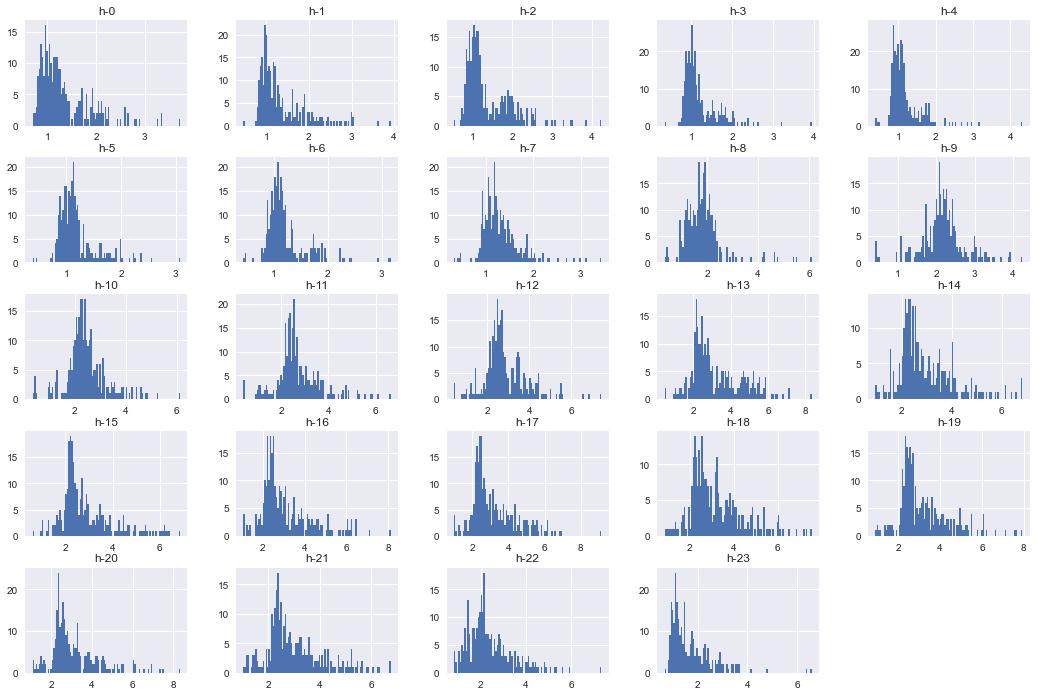

In [12]:
histograma = df_consumos.hist(xlabelsize=10, ylabelsize=10, bins=100, figsize=(18, 12))

**2. Gráfico de densidades**

Visualiza la distribución de los datos. Es una variable del histograma, pero elimina el ruido, por lo que son mejores para determinar la forma de distribución de un atributo. Lo spicos del gráfico de densidad ayudan a mostrar dónde los valores se concentran más. 

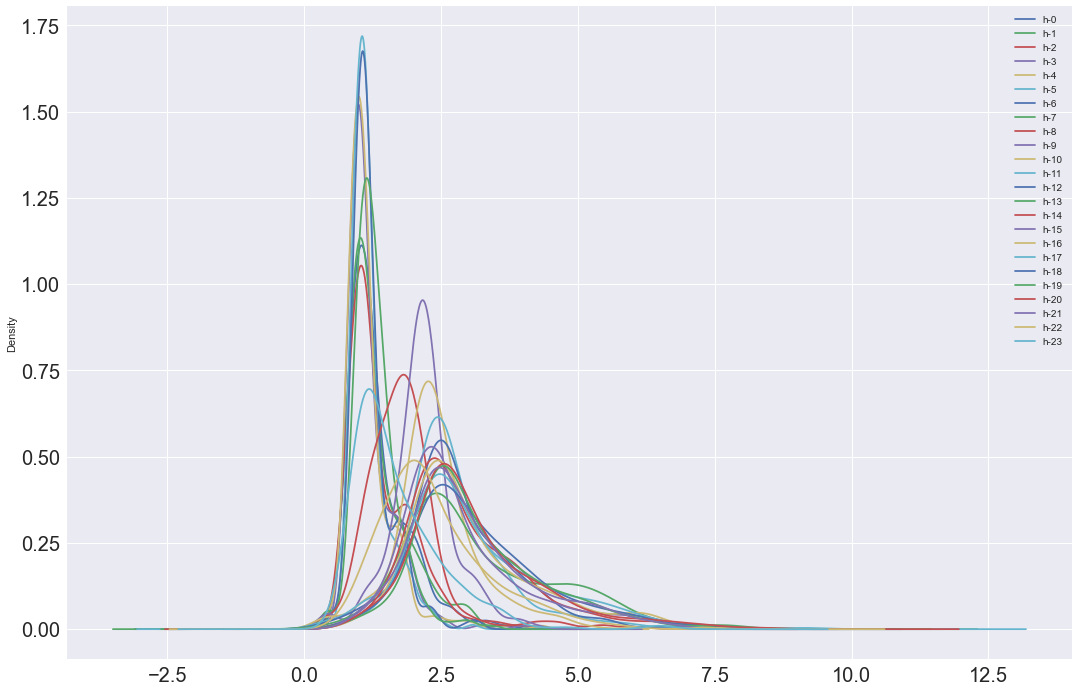

In [13]:
density = df_consumos.plot(kind='kde', legend=True, layout=(1, 1), figsize=(18, 12),
                        fontsize=20, stacked=True) 

**3. Boxplots** 

El boxplot (diagrama de caja) nos permite identificar los valores atípicos y comparar distribuciones. Además, se conoce como se distribuyen el 50% de los valores (dentro de la caja). 

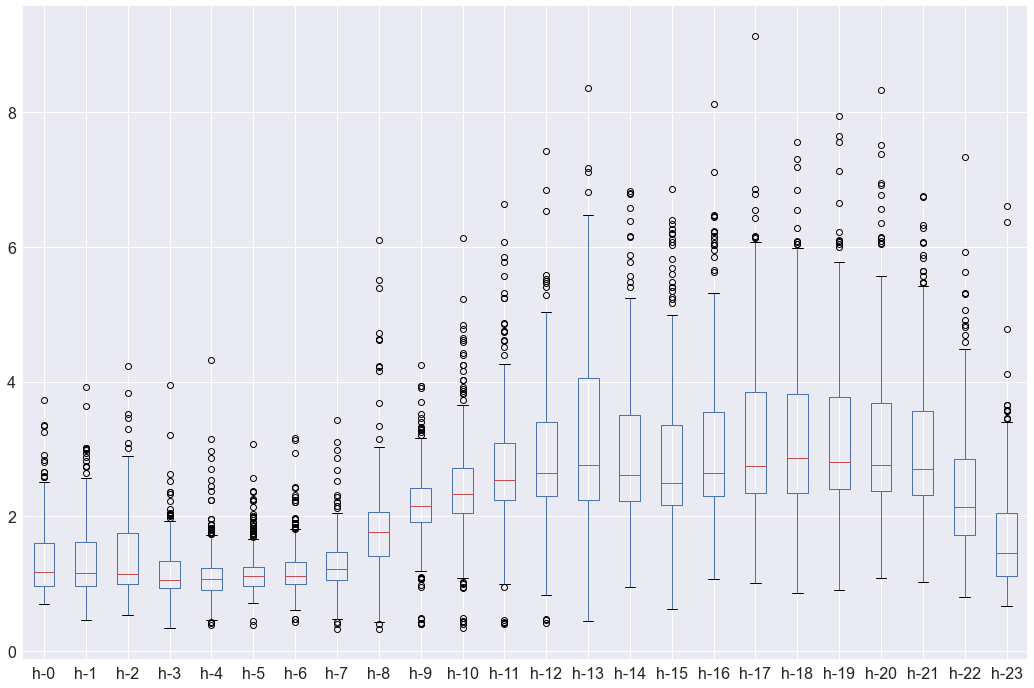

In [14]:
boxplot = df_consumos.plot(kind='box', legend=True, layout=(1, 1), figsize=(18, 12),
                        fontsize=16, stacked=True) 


## *4. Preparar los datos*

1. Escalar datos. 


### Ploteamos los datos
El gráfico muestra el consumo horario de un grupo de consumidores durante un día.

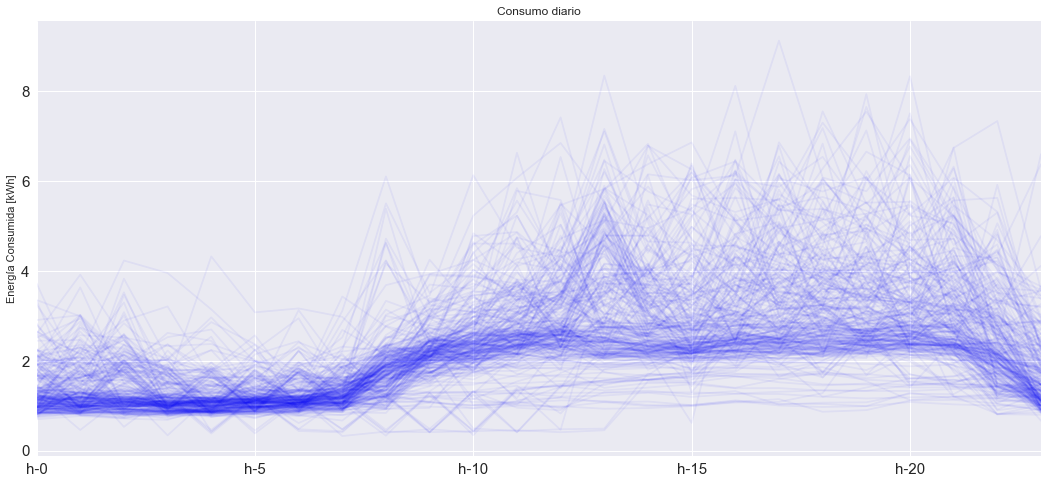

In [15]:
# Consumo horario
df_consumos.T.plot(figsize=(18, 8), title='Consumo diario', legend=False, color='blue', alpha=0.05, 
                   fontsize=15, xlim=[0,23], ylabel='Energía Consumida [kWh]')



**1. Escalar los datos**. 

Se escalan los datos utilizando el método de *MinMaxScaler()*

In [16]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = df_consumos.values.copy()
X_scale = pd.DataFrame(scaler.fit_transform(X))
X_scale.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,0.227216,0.236060,0.216669,0.232494,0.199708,0.397104,0.332722,0.434184,0.520019,0.670807,...,0.436224,0.457532,0.272760,0.498568,0.329981,0.287025,0.225647,0.311429,0.182027,0.107224
1,0.206643,0.218703,0.226327,0.220662,0.201738,0.390513,0.329515,0.327268,0.378282,0.592964,...,0.295961,0.345913,0.231604,0.251855,0.317903,0.242872,0.208889,0.285414,0.070384,0.094411
2,0.168966,0.241846,0.154464,0.206546,0.188229,0.289799,0.247961,0.313904,0.234032,0.430513,...,0.258078,0.262179,0.216952,0.170254,0.254076,0.257625,0.686252,0.285021,0.222826,0.082273
3,0.128398,0.179287,0.158652,0.198658,0.188800,0.260559,0.251627,0.246115,0.208164,0.461533,...,0.215859,0.262220,0.157880,0.196921,0.251383,0.219125,0.193786,0.297088,0.057945,0.089269
4,0.068495,0.121284,0.137444,0.134376,0.162481,0.223150,0.232383,0.279849,0.201317,0.532419,...,0.308206,0.365825,0.232137,0.217028,0.287317,0.251440,0.302507,0.302597,0.392108,0.249431


## 5. Construcción del modelo de aprendizaje NO supervisado: Clustering de consumos utilizando K-means

Se agrupan los datos utilizando el algoritmo [K-Means](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html).

El algoritmo K-means necesita que se le indique el número de clústers en que se quieren agrupar los datos. Se ejecuta el algoritmo para varios clusters y luego se comparan los resultados utilizando el método Elbow, que indicará el número óptimo de clusters.

In [17]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

elbow_method = []

# Evalúo el algoritmo K-means para un rango de [2,10] clústers 
n_cluster_list = range(1,15)
print(list(n_cluster_list))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]


### ¿Cómo saber el número óptimo de clusters? Con el método de Elbow.
Se utiliza el [Método de Elbow] para ayudarnos a elegir el número óptimo de clusters. 

* Este método utiliza los valores de la inercia obtenidos tras aplicar el K-means a diferente número de Clusters (desde 1 a N Clusters), siendo la inercia la suma de las distancias al cuadrado de cada objeto del Cluster a su centroide.
* Para hacer uso de este método partimos del cálculo de la distorsión promedio de cada clúster, esto es la distancia de cada elemento con su centroide correspondiente.
* Buscamos la parte de la gráfica donde la línea es menos suave o cambia abruptamente lo que forma un “codo”.

[Método de Elbow]: https://jarroba.com/seleccion-del-numero-optimo-clusters/


<img src="figuras/elbow-method.png" alt="Drawing" style="width: 800px;"/>

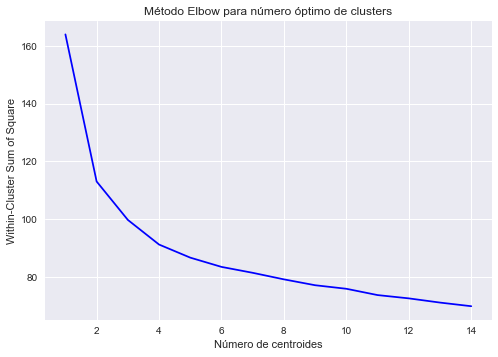

In [18]:
import matplotlib.pyplot as plt

# Iteración para evaluar K-means para diferentes números de clusters (n_clusters)
for n_cluster in n_cluster_list:
    kmeans = KMeans(n_clusters=n_cluster, random_state=0)
    cluster_found = kmeans.fit_predict(X_scale)
    elbow_method.append(kmeans.inertia_) 


# Gráfica del método de Elbow
plt.plot(n_cluster_list, elbow_method, 'bx-')
plt.xlabel('Número de centroides')
plt.ylabel('Within-Cluster Sum of Square')
plt.title('Método Elbow para número óptimo de clusters')
plt.show()

# El número óptimo de clusters es de k=2

In [19]:
# Entreno el K-means para k=2, visto el resultado del método Elbow
kmeans = KMeans(n_clusters=3)
cluster_found = kmeans.fit_predict(X_scale)
cluster_found_sr = pd.Series(cluster_found, name='cluster')

# Creo un multindex del tipo: (fecha,cluster al que pertenece el día)
df_consumos = df_consumos.set_index(cluster_found_sr, append=True)

#Guardamos los clusters en un excel
df_consumos.to_excel('dataset/resultados-clusters.xlsx')

df_consumos.index

MultiIndex([(100001, 2),
            (100002, 0),
            (100003, 0),
            (100004, 0),
            (100005, 0),
            (100006, 0),
            (100007, 0),
            (100008, 0),
            (100009, 0),
            (100010, 0),
            ...
            (100272, 0),
            (100273, 0),
            (100274, 0),
            (100275, 2),
            (100276, 0),
            (100277, 0),
            (100278, 0),
            (100279, 0),
            (100280, 0),
            (100281, 0)],
           names=['CUPs', 'cluster'], length=281)

Text(0.5, 0, 'Horas')

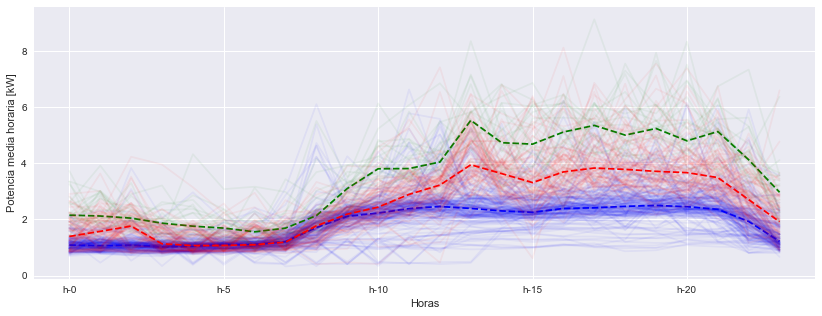

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(14,5))
color_list = ['blue', 'green', 'red']
cluster_values = sorted(df_consumos.index.get_level_values('cluster').unique())

for cluster, color in zip(cluster_values, color_list):
    # ploteo todas las lineas de cada cluster
    df_consumos.xs(cluster, level=1).T.plot(ax=ax, legend=False, alpha=0.05, color=color)
    # ploteo la línea con el valor de la mediana de cada cluster
    df_consumos.xs(cluster, level=1).median().plot(ax=ax, color=color, legend=False, alpha=1, ls='--')

ax.set_ylabel('Potencia media horaria [kW]')
ax.set_xlabel('Horas')


K-means ha encontrado los los clúster con las siguientes características, mirando la gráfica anterior:
* El clúster de azul concentra los patrones de consumo menos elevados.
* El clúster rojo concentra una mayor potencia media horaria de consumo.
